# Intro to reimbursements: overview with visualization

This notebook provides an overview of the `2017-03-15-reimbursements.xz` dataset, which contains broad data regarding CEAP usage in all terms since 2009.

It aims to provide an example of basic analyses and visualization by exploring topics such as:

- Evolution of average monthly spending along the years
- Average monthly spending per congressperson along the years
- Seasonality in reimbursements
- Reimbursements by type of spending
- Which party has the most spending congressmen?
- Who were the top spenders of all time in absolute terms?
- Who were the most hired suppliers by amount paid?
- Which are the most expensive individual reimbursements?

Questions are not explicitly answered (e.g. written answers). Charts and tables are provided for free interpretation.

**Obs.: This version is made with emphasys in Santa Catarina from jan/2015 to apr/2017.**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

# Charts styling
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15, 8
matplotlib.rcParams.update({'font.size': 14})
#rcParams['font.family'] = 'Georgia'

# Type setting for specific columns
#DTYPE = dict(cnpj=np.str, cnpj_cpf=np.str, ano=np.int16, term=np.str)

# Experimenting with 'category' type to reduce df size
DTYPE =dict(cnpj_cpf=np.str,\
            year=np.int16,\
            month=np.int16,\
            installment='category',\
            term_id='category',\
            term='category',\
            document_type='category',\
            subquota_group_id='category',\
            subquota_group_description='category',\
            #subquota_description='category',\
            subquota_number='category',\
            state='category',\
            party='category')

In [2]:
reimbursements = pd.read_csv('../data/2017-03-15-reimbursements.xz', \
                             dtype=DTYPE, low_memory=False, parse_dates=['issue_date'])

In [53]:
# Creates a DataFrame copy with fewer columns
r = reimbursements[['year', 'month', 'total_net_value', 'party', 'state', 'term', 'issue_date',\
        'congressperson_name', 'subquota_description','supplier', 'cnpj_cpf']]
r.head()

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
0,2009,4,130.00,PP,PR,2015.0,2009-04-06 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,MELHOR POSTO DE COMBUSTÍVEIS LTDA,02989654001197
1,2009,4,135.00,PP,PR,2015.0,2009-04-07 00:00:00.0,DILCEU SPERAFICO,"Locomotion, meal and lodging",MELONGENA PARTICIPAÇÕES LTDA,09259358000450
2,2009,3,1000.00,PP,PR,2015.0,2009-03-12 00:00:00.0,DILCEU SPERAFICO,Maintenance of office supporting parliamentary...,ARY ANTONIO MOSCHETTA,01537369920
3,2009,4,170.00,PP,PR,2015.0,2009-04-14 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,CONVER COMBUSTÍVEIS AUTOMÓVEIS LTDA,00038505000579
4,2009,4,100.11,PP,PR,2015.0,2009-04-09 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,GRANDO E GROFF LTDA,00161576000211


## Filters depending on the scope of analysis
Here, filters by state, party, years, etc. can be applied.

In [54]:
# Filters only by congresmen in Santa Catarina
r = r[r.state == 'SC']

# Filters only most recent years (from 2015)
r = r[(r.year == 2015) | (r.year == 2016) | (r.year == 2017)]

r.head()

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
1153612,2015,1,9000.00,PMDB,SC,2015.0,2015-01-27 00:00:00.0,EDINHO BEZ,"Consultancy, research and technical work",BALBI AGENCIA DE PUBLICIDADE LTDA,10802002000158
1153613,2015,1,16000.00,PMDB,SC,2015.0,2015-01-28 00:00:00.0,EDINHO BEZ,Publicity of parliamentary activity,GRAFICA DO LELO LTDA,85288090000110
1153614,2015,1,546.51,PMDB,SC,2015.0,2015-01-07 00:00:00.0,EDINHO BEZ,Telecommunication,TIM CELULAR S.A.,04206050000180
1153615,2015,1,379.64,PMDB,SC,2015.0,2015-01-13 00:00:00.0,EDINHO BEZ,Telecommunication,Telefônica Brasil S.A. (VIVO),02558157000162
1153616,2015,1,242.95,PMDB,SC,2015.0,2015-01-15 00:00:00.0,EDINHO BEZ,Telecommunication,OI S.A.,76535764000143


## Questions & answers

### Evolution of average monthly spending along the years
Are congressmen spending more today in relation to past years?

#### How many congressmen in each year?

In [55]:
years = r.year.unique()

# Computes unique names in each year and saves into a pd.Series
d = dict()
for y in years:
    d[y] = len(r[r.year == y].congressperson_name.unique())

s = pd.Series(d)
s

2015    22
2016    18
2017    18
dtype: int64

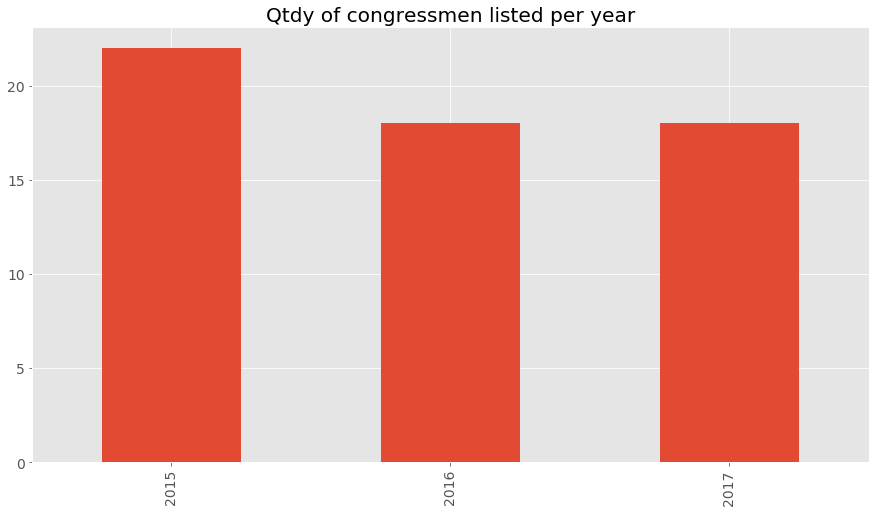

In [56]:
s.plot(kind='bar')
plt.title('Qtdy of congressmen listed per year')

#### How much did they spend, in average, per month in each year?

In [57]:
# Groups by name summing up spendings
a = r.groupby(['year']).sum().drop('month', 1)
a['congressmen_qty'] = s
a['monthly_value_per_congressmen'] = a['total_net_value'] / a['congressmen_qty'] / 12
a = a.drop(2017, 0)  # Neglets 2017

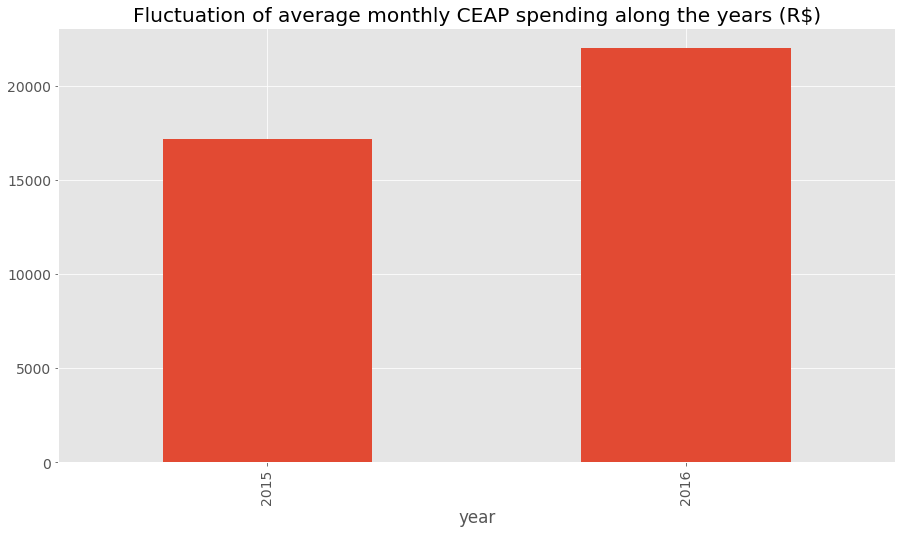

In [58]:
a.monthly_value_per_congressmen.plot(kind='bar')
plt.title('Fluctuation of average monthly CEAP spending along the years (R$)')

### Average monthly spending per congressperson along the years
This table shows the data above detailed per congressperson.

In [59]:
# Groups by name summing up spendings
a = r.groupby(['congressperson_name', 'year'])\
    .sum()\
    .drop('month', 1)

# Computes average spending per month and unstacks
a['monthly_total_net_value'] = a['total_net_value'] / 12
a = a.drop('total_net_value', 1).unstack()

# Creates subtotal column to the right
a['mean'] = a.mean(axis=1)

a.head()

monthly_total_net_value                             \
year                                   2015          2016         2017   
congressperson_name                                                      
ANGELA ALBINO                   4127.000833  25310.354167    28.820000   
CARMEN ZANOTTO                 19395.440833  23374.529167  2773.255833   
CELSO MALDANER                 26152.434167  26222.968333  1688.956667   
CESAR SOUZA                    11918.338333   1207.111667    16.666667   
DÉCIO LIMA                     30128.075000  33268.345833  5710.105000   

                             mean  
year                               
congressperson_name                
ANGELA ALBINO         9822.058333  
CARMEN ZANOTTO       15181.075278  
CELSO MALDANER       18021.453056  
CESAR SOUZA           4380.705556  
DÉCIO LIMA           23035.508611

### Seasonality in reimbursements
Out of curiosity,in which period of the year more reimbursements were issued?

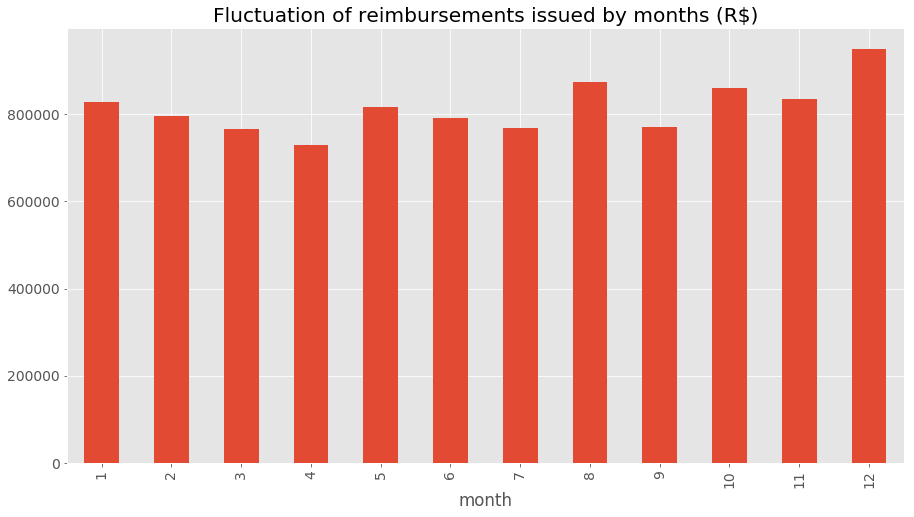

In [60]:
r.groupby('month')\
    .sum()\
    .total_net_value\
    .sort_index()\
    .plot(kind='bar')
    
plt.title('Fluctuation of reimbursements issued by months (R$)')

### Reimbursements by type of spending
For what are congressmen most using their quota?

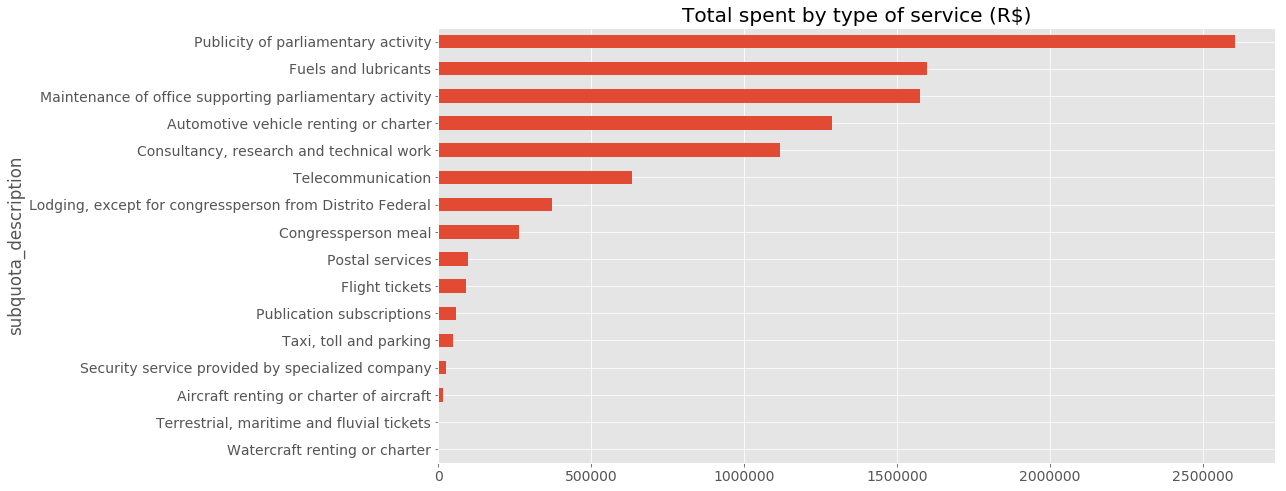

In [61]:
r.groupby('subquota_description')\
    .sum()\
    .total_net_value\
    .sort_values(ascending=True)\
    .plot(kind='barh')
    
plt.title('Total spent by type of service (R$)')

### Which party has the most spending congressmen?

##### How many congressmen in each party?

In [62]:
parties = r.party.unique()
parties

[PMDB, PSB, PP, PT, PSDB, PSD, PR, PPS, PCdoB]
Categories (9, object): [PMDB, PSB, PP, PT, ..., PSD, PR, PPS, PCdoB]

In [63]:
# Computes unique names in each party and saves into a pd.Series
d = dict()
for p in parties:
    d[p] = len(r[r.party == p].congressperson_name.unique())

s = pd.Series(d)
s

PCdoB    1
PMDB     6
PP       2
PPS      1
PR       1
PSB      2
PSD      4
PSDB     2
PT       3
dtype: int64

#### How much did congressmen from each party spend in the year, in average? 

In [64]:
t = r.groupby('party').sum()
t = t.drop(['year', 'month'], 1)  # Removes useless columns

t['congressmen_per_party'] = s
years = len(r.year.unique())

In [65]:
t['monthly_value_per_congressperson'] = t['total_net_value'] / t['congressmen_per_party'] / (12*years)
t.sort_values(by='monthly_value_per_congressperson', ascending=False).head()

,total_net_value,congressmen_per_party,monthly_value_per_congressperson
party,,,
PR,764980.97,1.0,21249.471389
PSDB,1526068.74,2.0,21195.399167
PMDB,3593076.83,6.0,16634.614954
PPS,546518.71,1.0,15181.075278
PT,1506437.65,3.0,13948.496759


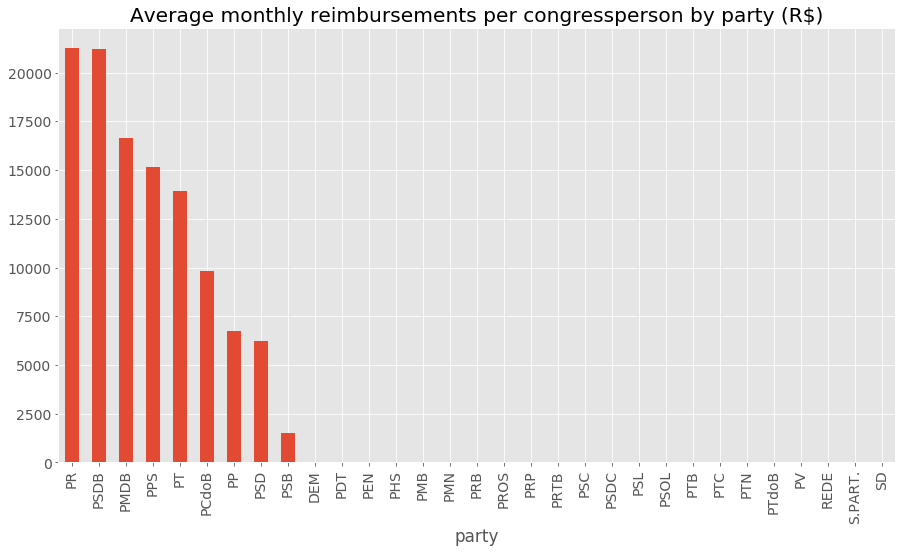

In [66]:
t.monthly_value_per_congressperson\
    .sort_values(ascending=False)\
    .plot(kind='bar')

plt.title('Average monthly reimbursements per congressperson by party (R$)')

### Who were the top spenders of all time in absolute terms?

In [67]:
r.groupby('congressperson_name')\
    .sum()\
    .total_net_value\
    .sort_values(ascending=False)\
    .head(10)

congressperson_name
DÉCIO LIMA                  829278.31
MARCO TEBALDI               821276.88
JORGINHO MELLO              764980.97
RONALDO BENEDET             713334.04
GEOVANIA DE SÁ              704791.86
JOÃO RODRIGUES              703127.81
EDINHO BEZ                  663757.87
PEDRO UCZAI                 649552.14
CELSO MALDANER              648772.31
ROGÉRIO PENINHA MENDONÇA    641145.43
Name: total_net_value, dtype: float64

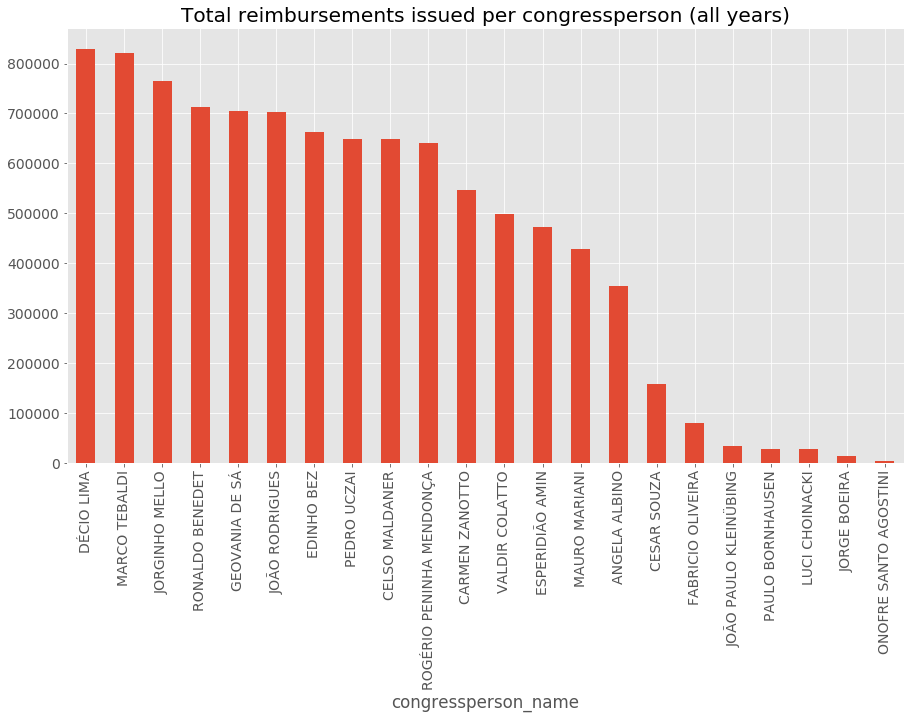

In [68]:
r.groupby('congressperson_name')\
    .sum()\
    .total_net_value\
    .sort_values(ascending=False)\
    .head(30)\
    .plot(kind='bar')

plt.title('Total reimbursements issued per congressperson (all years)')

### Who were the most hired suppliers by amount paid?
This analysis identifies suppliers by their unique CNPJ. It is worth noting that, commonly, some telecom carriers use different CNPJ for its subsidiaries in different states (e.g. TIM SP, TIM Sul, etc).

In [69]:
sp = r.groupby(['cnpj_cpf', 'supplier', 'subquota_description'])\
        .sum()\
        .drop(['year', 'month'], 1)\
        .sort_values(by='total_net_value', ascending=False)

sp.reset_index(inplace=True)  
sp = sp.set_index('cnpj_cpf')

sp.head()

,supplier,subquota_description,total_net_value
cnpj_cpf,,,
10802002000158,BALBI AGENCIA DE PUBLICIDADE LTDA,Publicity of parliamentary activity,180000.00
76817808000128,3 DE MAIO GRAFICA,Publicity of parliamentary activity,178184.00
04206050014645,TIM CELULAR S.A.,Telecommunication,171333.58
17153227000170,BRASIL LEASING,Automotive vehicle renting or charter,158769.33
05727356000145,ESTRELA LOCADORA DE VEÍCULOS LTDA ME,Automotive vehicle renting or charter,157770.00


In [70]:
cnpj = r.groupby('cnpj_cpf')\
        .sum()\
        .drop(['year', 'month'], 1)\
        .sort_values(by='total_net_value', ascending=False)

cnpj.head()

,total_net_value
cnpj_cpf,
10802002000158,243000.00
76817808000128,178184.00
04206050014645,171333.58
17153227000170,158769.33
05727356000145,157770.00


In [71]:
# Adds supplier name besides total_net_value in cnpj df

cnpj['supplier'] = ''  # Creates empty column
cnpj = cnpj.head(1000)  # Gets only first 1000 for this analysis

In [72]:
# Looks up for supplier names in sp df and fills cnpj df (it takes a while to compute...)

for i in range(len(cnpj)):
    try:
        cnpj.set_value(cnpj.index[i], 'supplier', sp.loc[cnpj.index[i]].supplier.iloc[0])
    except:
        cnpj.set_value(cnpj.index[i], 'supplier', sp.loc[cnpj.index[i]].supplier)

cnpj.head(10)

,total_net_value,supplier
cnpj_cpf,,
10802002000158,243000.00,BALBI AGENCIA DE PUBLICIDADE LTDA
76817808000128,178184.00,3 DE MAIO GRAFICA
04206050014645,171333.58,TIM CELULAR S.A.
17153227000170,158769.33,BRASIL LEASING
05727356000145,157770.00,ESTRELA LOCADORA DE VEÍCULOS LTDA ME
02558157000162,152660.48,TELEFÔNICA BRASIL S.A.
18912417000196,143533.00,BERIMBAU PRODUCOES
09145316000146,134096.00,PRINT RIOSUL INDUSTRIA GRAFICA LTDA
04388461000134,127204.71,POSTO ALIANÇA


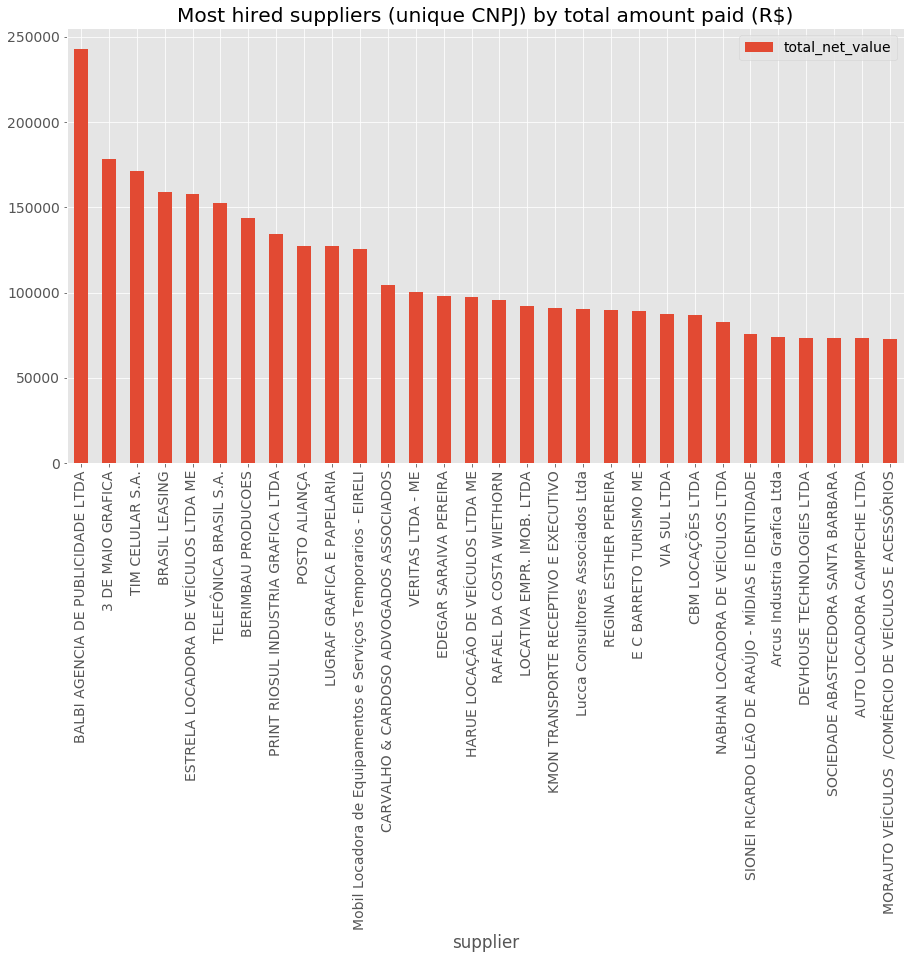

In [73]:
# Fixes better indexing to plot in a copy
sp2 = cnpj.set_index('supplier')

sp2.head(30)\
    .plot(kind='bar')

plt.title('Most hired suppliers (unique CNPJ) by total amount paid (R$)')

#### Which congressmen hired the top supplier and how much did they pay?

In [74]:
r.groupby(['cnpj_cpf', 'congressperson_name'])\
    .sum()\
    .sort_values(by='total_net_value', ascending=False)\
    .loc['02558157000162']\
    .total_net_value\
    .head(20)

congressperson_name
CARMEN ZANOTTO              35587.70
GEOVANIA DE SÁ              31231.55
MARCO TEBALDI               22082.42
EDINHO BEZ                  21249.05
ESPERIDIÃO AMIN             17964.85
JORGINHO MELLO               6506.97
CELSO MALDANER               5331.40
CESAR SOUZA                  4649.98
JORGE BOEIRA                 2661.23
PAULO BORNHAUSEN             1548.62
RONALDO BENEDET              1353.27
ROGÉRIO PENINHA MENDONÇA     1053.76
DÉCIO LIMA                    619.64
MAURO MARIANI                 421.70
VALDIR COLATTO                398.34
Name: total_net_value, dtype: float64

### Which are the most expensive individual reimbursements?

In [75]:
r = r.sort_values(by='total_net_value', ascending=False)
r.head(20)

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
1403578,2016,5,57000.0,PT,SC,2015.0,2016-05-25T00:00:00,DÉCIO LIMA,Publicity of parliamentary activity,3 DE MAIO GRAFICA,76817808000128
1195530,2015,12,45000.0,PT,SC,2015.0,2015-12-11 00:00:00.0,DÉCIO LIMA,Publicity of parliamentary activity,3 DE MAIO GRAFICA,76817808000128
1264662,2015,12,42198.0,PPS,SC,2015.0,2015-12-22 00:00:00.0,CARMEN ZANOTTO,Publicity of parliamentary activity,GRAPHEL GRAF E EDIT. LAGES LTDA,04484195000143
1194935,2015,6,34300.0,PT,SC,2015.0,2015-06-03 00:00:00.0,DÉCIO LIMA,Publicity of parliamentary activity,3 DE MAIO GRAFICA,76817808000128
1195434,2015,11,28014.0,PT,SC,2015.0,2015-11-24 00:00:00.0,DÉCIO LIMA,Publicity of parliamentary activity,PRINT RIOSUL INDUSTRIA GRAFICA LTDA,09145316000146
1435380,2016,11,25999.5,PT,SC,2015.0,2016-11-21T00:00:00,PEDRO UCZAI,Publicity of parliamentary activity,GL EDITORA GRÁFICA,04137442000135
1359248,2015,1,25000.0,PT,SC,2011.0,2015-01-15 00:00:00.0,LUCI CHOINACKI,Publicity of parliamentary activity,JJ TECNOLOGIA E COMUNICAÇÃO LTDA - ME,09532145000108
1403308,2016,3,22500.0,PT,SC,2015.0,2016-03-03T00:00:00,DÉCIO LIMA,Publicity of parliamentary activity,3 DE MAIO GRAFICA,76817808000128
1195442,2015,10,22000.0,PT,SC,2015.0,2015-12-07 00:00:00.0,DÉCIO LIMA,"Consultancy, research and technical work",LOVERS AGENCIA DE PROPAGANDA,84910413000101
1154363,2015,12,21042.0,PMDB,SC,2015.0,2015-12-18 00:00:00.0,EDINHO BEZ,Publicity of parliamentary activity,GRAFICA DO LELO LTDA,85288090000110
